In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("Daily Household Transactions.csv")
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR


In [3]:
df.shape

(2461, 8)

In [4]:
df['Date'] = df['Date'].str.split(' ').str[0]

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date', ascending=True)

df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df

,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
Date,,,,,,,
2015-01-01,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR
2015-01-01,Credit Card,Food,NaN,bendys chicken biryani,400.0,Expense,INR
2015-01-01,Cash,Transportation,NaN,share jeep - Place T top to base,20.0,Expense,INR
2015-01-01,Cash,Transportation,NaN,share jeep - Place T to brc,60.0,Expense,INR
2015-01-01,Cash,Culture,NaN,monument,40.0,Expense,INR
...,...,...,...,...,...,...,...
2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
2018-09-19,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2461 entries, 2015-01-01 to 2018-09-20
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mode            2461 non-null   object 
 1   Category        2461 non-null   object 
 2   Subcategory     1826 non-null   object 
 3   Note            1940 non-null   object 
 4   Amount          2461 non-null   float64
 5   Income/Expense  2461 non-null   object 
 6   Currency        2461 non-null   object 
dtypes: float64(1), object(6)
memory usage: 153.8+ KB


In [6]:
df.duplicated().sum()

742

In [7]:
df = df.drop_duplicates()

In [8]:
df.isna().sum()

Mode                0
Category            0
Subcategory       392
Note              193
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(1201, 7)

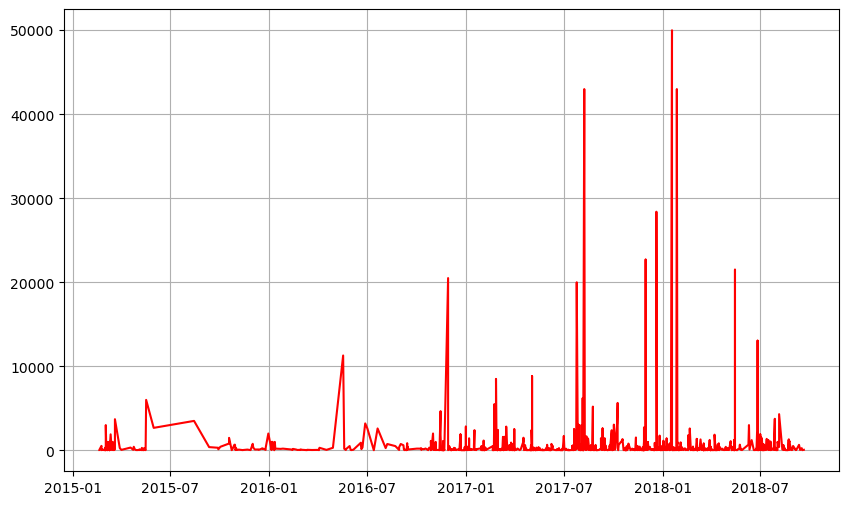

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Amount'], linestyle='-', color='r')
plt.grid(True)
plt.show()

In [12]:
df.columns

Index(['Mode', 'Category', 'Subcategory', 'Note', 'Amount', 'Income/Expense',
       'Currency'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Subcategory')

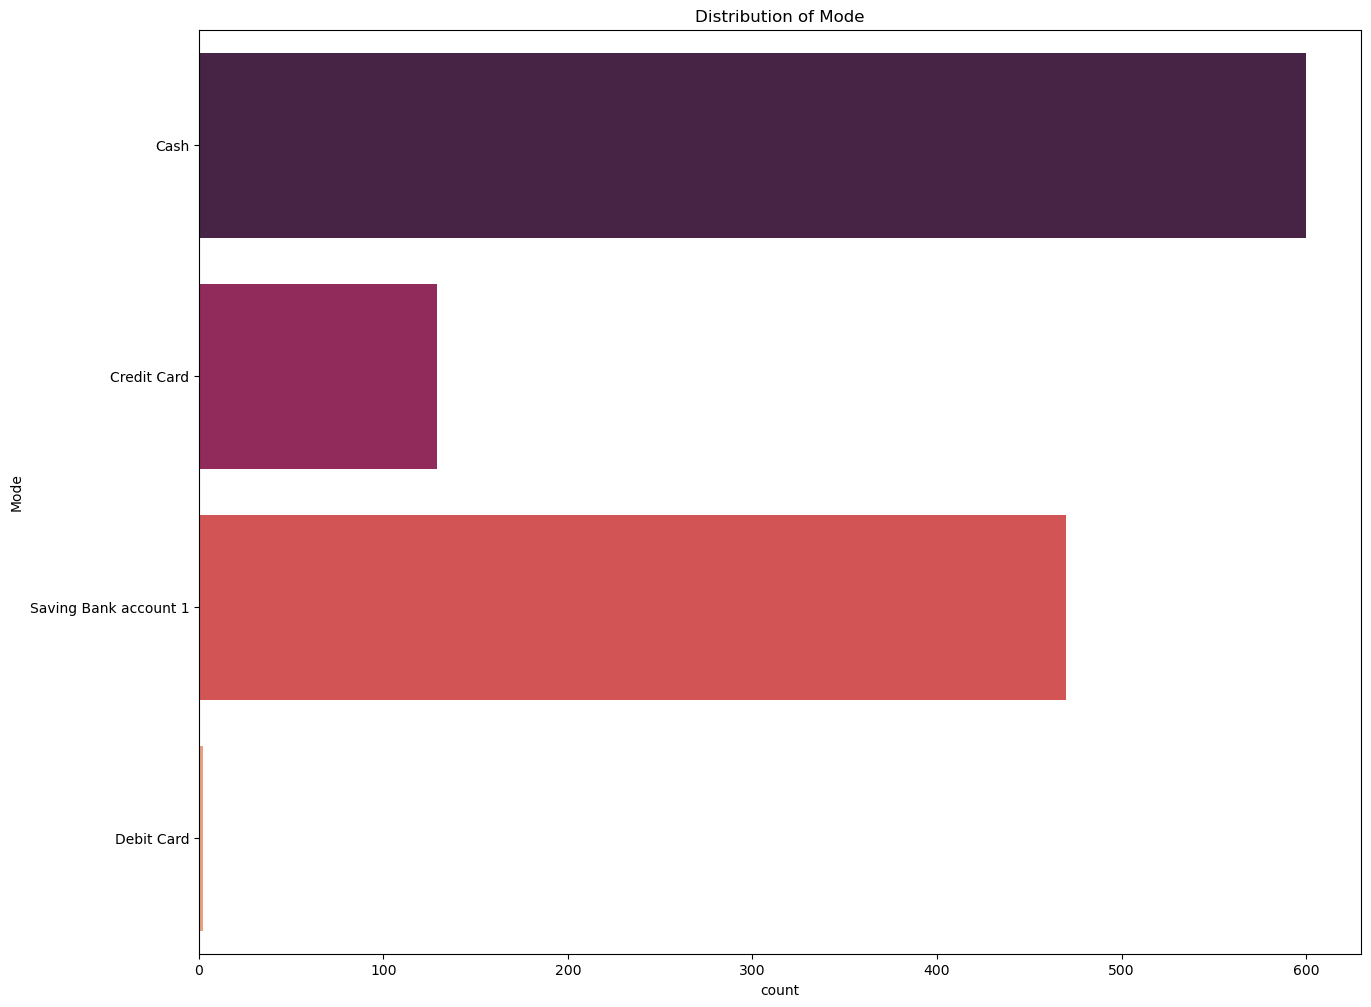

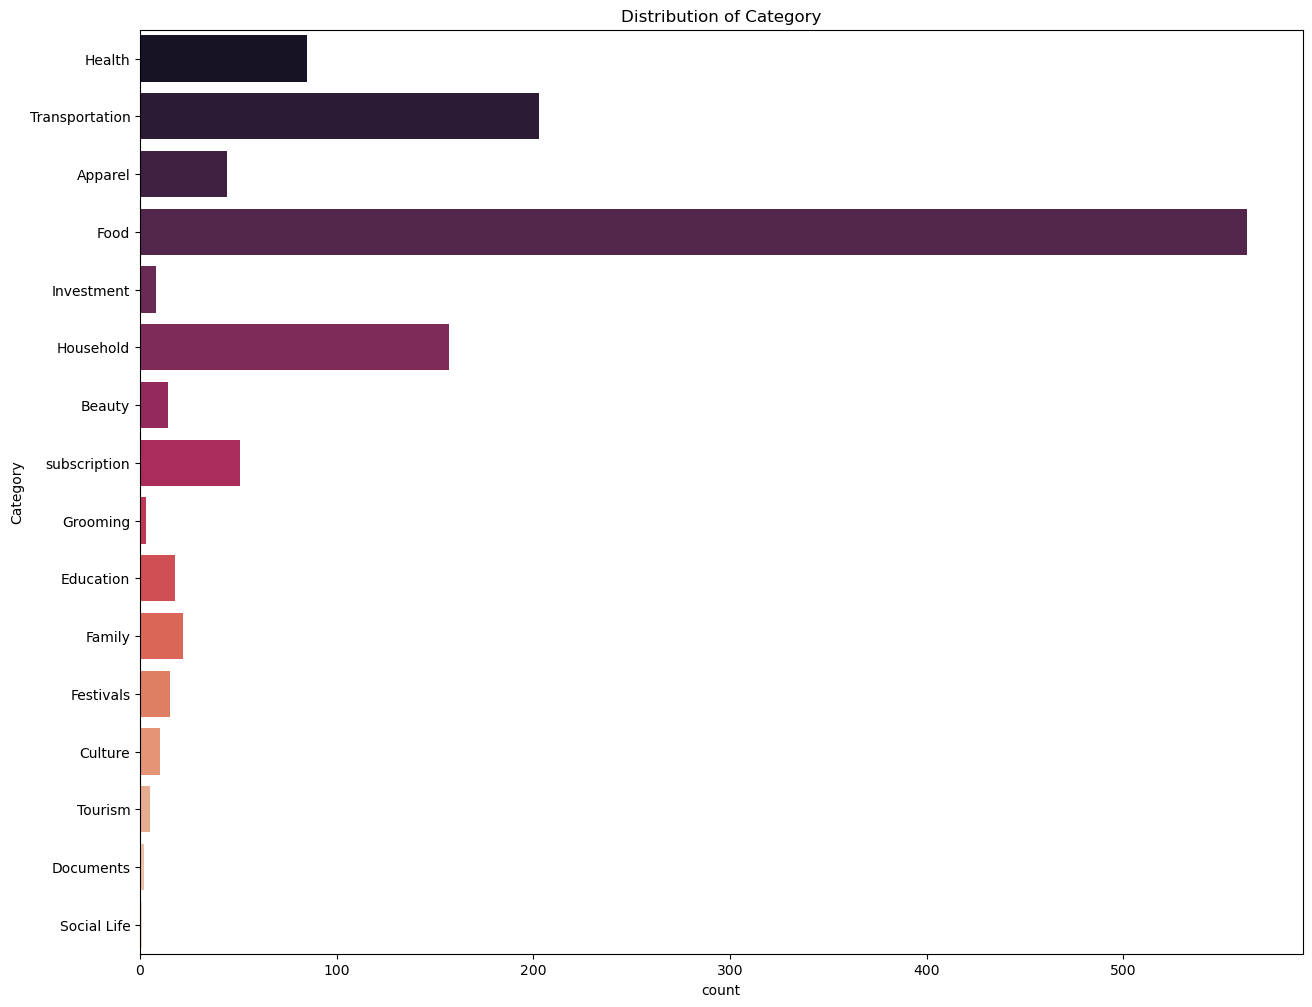

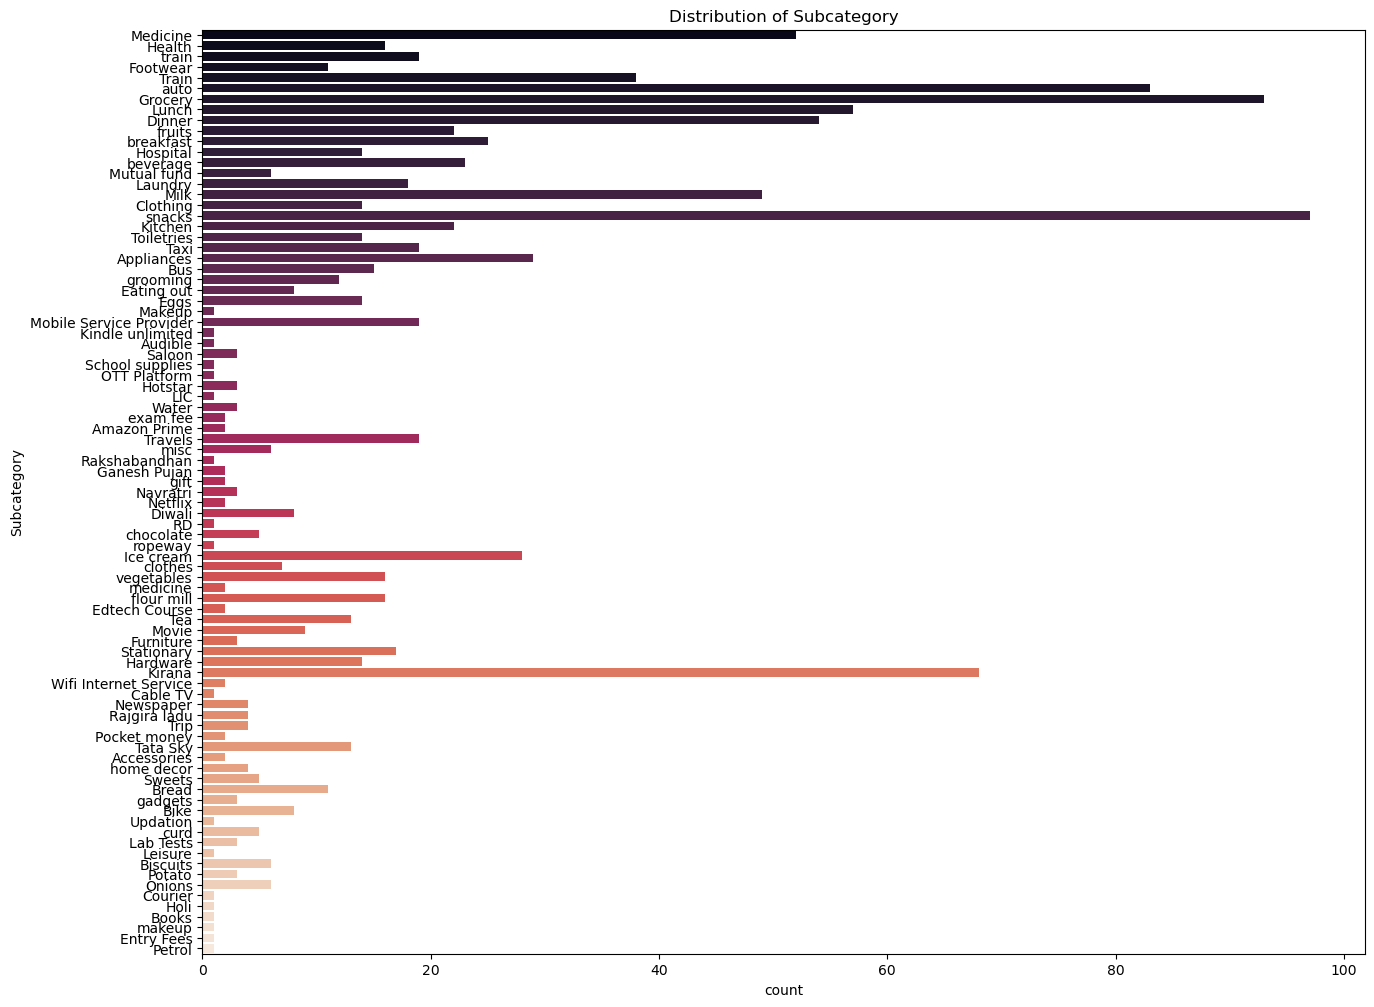

In [13]:
plt.figure(figsize=(15, 12))
sns.countplot(y='Mode', data=df, palette='rocket')
plt.title(f'Distribution of Mode')

plt.figure(figsize=(15, 12))
sns.countplot(y='Category', data=df, palette='rocket')
plt.title(f'Distribution of Category')

plt.figure(figsize=(15, 12))
sns.countplot(y='Subcategory', data=df, palette='rocket')
plt.title(f'Distribution of Subcategory')

Text(0.5, 0, 'Total Amount')

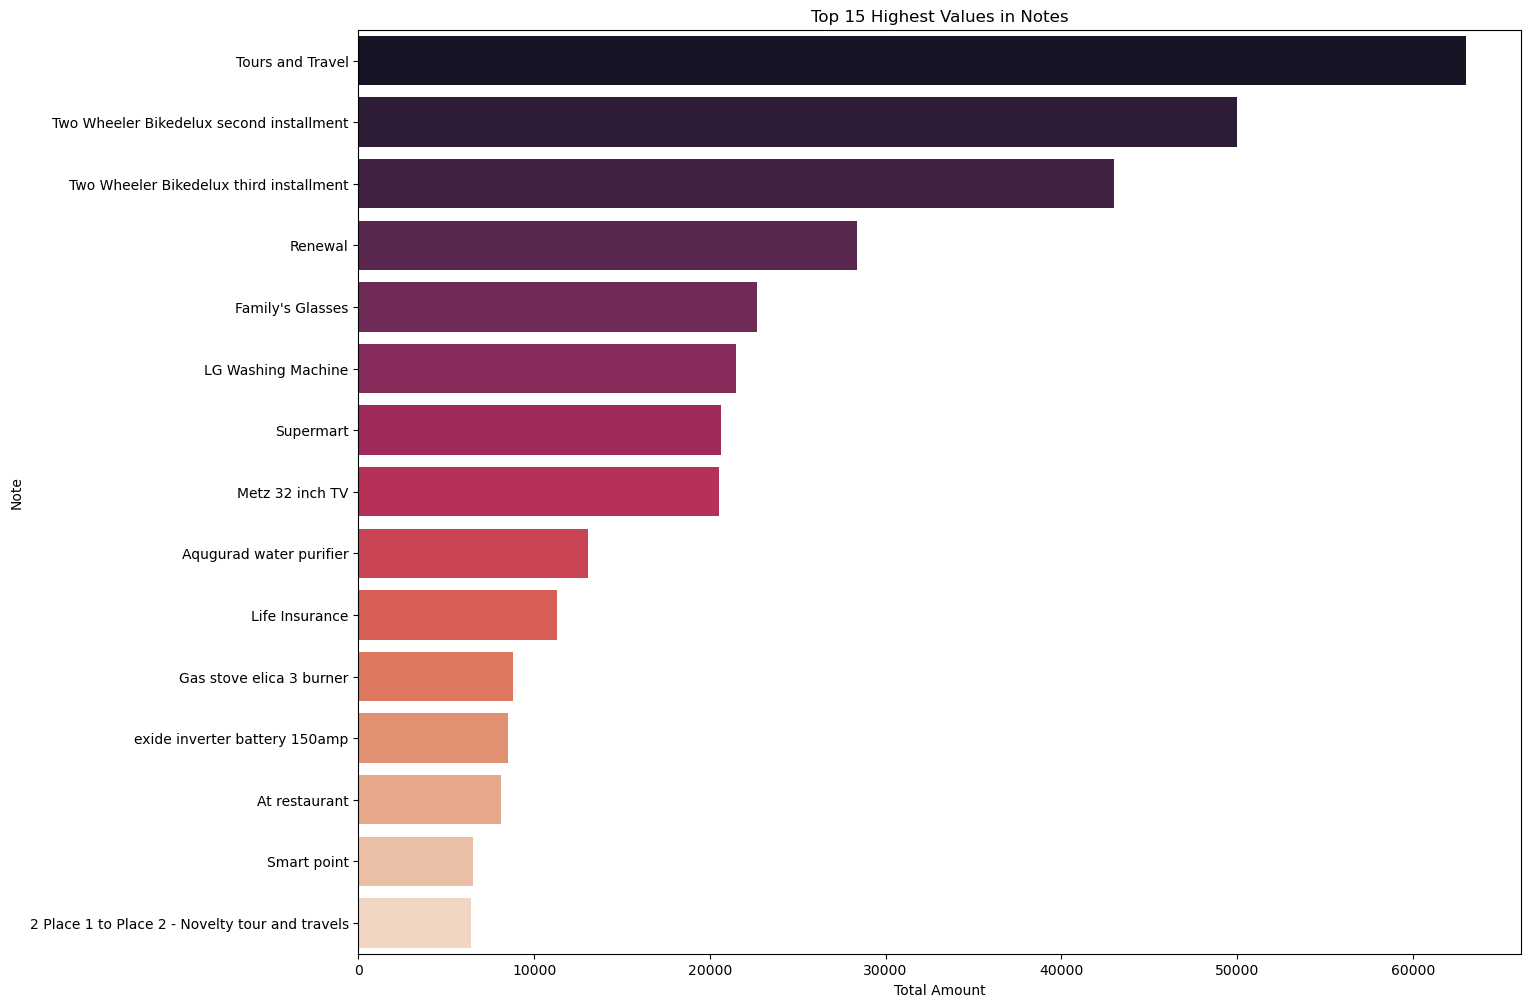

In [14]:
top_15_notes = df.groupby('Note')['Amount'].sum()
desc = top_15_notes.sort_values(ascending = False)
top_15_notes = desc.head(15)


plt.figure(figsize=(15, 12))
sns.barplot(y=top_15_notes.index, x=top_15_notes.values, palette='rocket')
plt.title('Top 15 Highest Values in Notes')
plt.ylabel('Note')
plt.xlabel('Total Amount')

<Figure size 1500x1000 with 0 Axes>

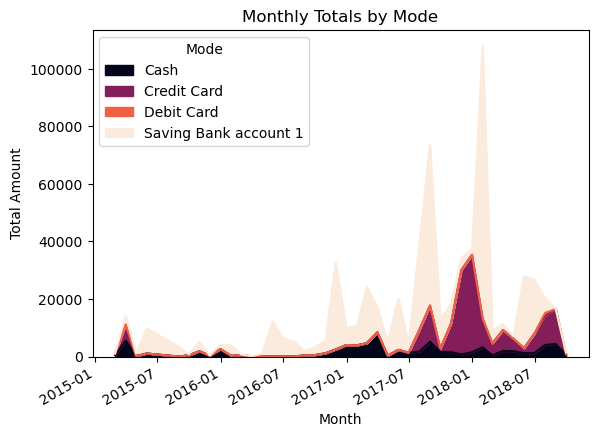

In [15]:
monthly_mode = df.groupby([pd.Grouper(freq='M'), 'Mode'])['Amount'].sum().unstack().fillna(0)

plt.figure(figsize=(15, 10))
monthly_mode.plot(kind='area', stacked=True, colormap='rocket')
plt.title('Monthly Totals by Mode')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend(title='Mode')
plt.show()